# 2015 - 01
Superposition: Represent each character from the input as a quantum state
- $|0⟩$ represents `(` (up + 1)
- $|1⟩$ represents `)` (down - 1)

Quantum Encoding: Encode the input as qubits in a register

Simulate adding or subtracting based on the qubit states

Measure the final result to collapse the quantum states to a classical output

There is no benefit to using quantum computing for this problem, it's actually quite a hinderence. For large inputs, we'll work in chunks to avoid the exponential growth of the quantum state space.

In [91]:
from IPython.display import display
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

def silver(instructions, draw=False):
  # encode as quantum states
  numOfInstructions = len(instructions)
  circuit = QuantumCircuit(numOfInstructions, numOfInstructions)

  # init qubits to represent instructions
  for i, char in enumerate(instructions):
    # ( is already encoded correctly as |0⟩
    # when ), apply an X gate to flip the qubit to |1⟩
    if (char == ')'):
      circuit.x(i)

  if (draw):
    display(circuit.draw('mpl'))

  circuit.measure(range(numOfInstructions), range(numOfInstructions))
  simulator = AerSimulator()
  compiled_circuit = transpile(circuit, simulator)
  result = simulator.run(compiled_circuit, shots=1).result()
  measurement = result.get_counts()

  if (draw):
    print(compiled_circuit.draw())
    print(measurement)

  final_floor = 0
  for key in measurement:
    for i, bit in enumerate(key[::-1]): # reverse order to start with LSB
      if (bit == '0'):
        final_floor += 1
      else:
        final_floor -= 1

  return final_floor

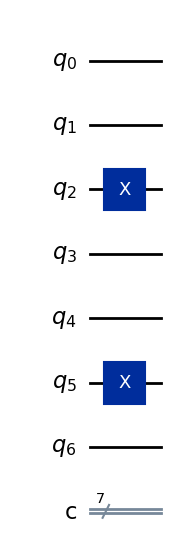

          ┌─┐               
q_0: ─────┤M├───────────────
          └╥┘┌─┐            
q_1: ──────╫─┤M├────────────
     ┌───┐ ║ └╥┘      ┌─┐   
q_2: ┤ X ├─╫──╫───────┤M├───
     └───┘ ║  ║ ┌─┐   └╥┘   
q_3: ──────╫──╫─┤M├────╫────
           ║  ║ └╥┘┌─┐ ║    
q_4: ──────╫──╫──╫─┤M├─╫────
     ┌───┐ ║  ║  ║ └╥┘ ║ ┌─┐
q_5: ┤ X ├─╫──╫──╫──╫──╫─┤M├
     └┬─┬┘ ║  ║  ║  ║  ║ └╥┘
q_6: ─┤M├──╫──╫──╫──╫──╫──╫─
      └╥┘  ║  ║  ║  ║  ║  ║ 
c: 7/══╩═══╩══╩══╩══╩══╩══╩═
       6   0  1  3  4  2  5 
{'0100100': 1}

The final floor is 3


In [92]:
instructions = "(()(()("
final_floor = silver(instructions, draw=True)
print(f"\nThe final floor is {final_floor}")

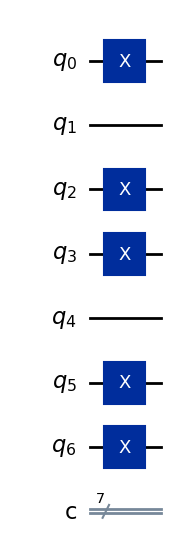

     ┌───┐      ┌─┐            
q_0: ┤ X ├──────┤M├────────────
     └───┘┌─┐   └╥┘            
q_1: ─────┤M├────╫─────────────
     ┌───┐└╥┘    ║ ┌─┐         
q_2: ┤ X ├─╫─────╫─┤M├─────────
     ├───┤ ║     ║ └╥┘┌─┐      
q_3: ┤ X ├─╫─────╫──╫─┤M├──────
     └───┘ ║ ┌─┐ ║  ║ └╥┘      
q_4: ──────╫─┤M├─╫──╫──╫───────
     ┌───┐ ║ └╥┘ ║  ║  ║ ┌─┐   
q_5: ┤ X ├─╫──╫──╫──╫──╫─┤M├───
     ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐
q_6: ┤ X ├─╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║ └╥┘
c: 7/══════╩══╩══╩══╩══╩══╩══╩═
           1  4  0  2  3  5  6 
{'1101101': 1}

The final floor is -3


In [93]:
instructions = ")())())"
final_floor = silver(instructions, draw=True)
print(f"\nThe final floor is {final_floor}")

In [94]:
with open('01.txt', 'r') as file:
  instructions = file.read().strip()

chunk_size = 25
chunks = [instructions[i:i + chunk_size] for i in range(0, len(instructions), chunk_size)]

final_floor = 0
for chunk in chunks:
  final_floor += silver(chunk)
print(f"\nThe final floor is {final_floor}")


The final floor is 74
